# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [ ]:
!pip3 install scikit-learn

In [79]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
import statsmodels.api as smf


In [9]:
# Your code here. 
student_data = pd.DataFrame({'Tardies': [10,1,5,9,4,2,9,6,0,3], 'Age': [17,51,27,21,36,48,19,26,54,30]})
student_data

,Tardies,Age
0,10,17
1,1,51
2,5,27
3,9,21
4,4,36
5,2,48
6,9,19
7,6,26
8,0,54
9,3,30


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Tardies', ylabel='Age'>

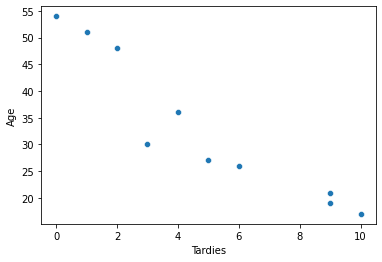

In [10]:
# Your code here.
sns.scatterplot(x=student_data["Tardies"], y=student_data["Age"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here.
# There is a relationship between them, the younger the student is the more often it goes late to class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [63]:
# Your response here.
covariance=student_data["Tardies"].cov(student_data["Age"])

covariance


-45.56666666666666

In [62]:
cov=student_data.cov()
cov

,Tardies,Age
Tardies,12.544444,-45.566667
Age,-45.566667,187.655556


In [59]:
correlation=student_data["Tardies"].corr(student_data["Age"])

correlation

-0.9391626886887121

The covariance is negative so the two variables move inverselly, the correlation is nearly 1 which indicates a linear relationchip between the variables

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [139]:
# Your response here.
lr= LinearRegression(fit_intercept=True)

In [140]:
rm=lr.fit(student_data["Age"].to_frame(),student_data["Tardies"])

In [141]:
m=lr.coef_
m

array([-0.24282077])

In [142]:
b=lr.intercept_
b

12.888803363135771

Plot your regression model on your scatter plot.

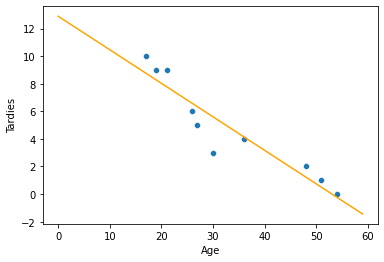

In [143]:
# Your code here.
x1=np.arange(0,60)
y1=m*x1+b
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])
plt.plot(x1,y1, c="orange")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

As a conclusion we can say that the two variables correlate, as the points in the graph are near the linear regresion line

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [42]:
# Import any libraries you may need & the data
cars=pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [50]:
# Your response here. 
c1=cars[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
c1

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [102]:
c1.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


The most important variable in determining the CO2 Emissions is Fuel Barrels/Year, and the least amount of useful information is provided by the Year variable, as the correlation is very low so this variable is not linear with the CO2 Emission.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [105]:
mod=smf.OLS(c1["CO2 Emission Grams/Mile"], c1["Fuel Barrels/Year"])

In [106]:
res=mod.fit()

In [107]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          2.164e+07
Date:                     Mon, 23 Nov 2020   Prob (F-statistic):                        0.00
Time:                             22:36:28   Log-Likelihood:                     -1.5864e+05
No. Observations:                    35952   AIC:                                  3.173e+05
Df Residuals:                        35951   BIC:                                  3.173e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.9498      0.006   4651.565      0.000      26.938      26.961
==============================================================================
Omnibus:                    89555.105   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1022572329.320
Skew:                          27.472   Prob(JB):                         0.00
Kurtosis:                     827.382   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# The most important variables are the Fuel Barrels/Year, Combined MPG and the Fuel Cost/Year 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [108]:
# Your code here. 
invite_attend = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
invite_attend

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [112]:
# Your response here.
lr= LinearRegression(fit_intercept=True)

In [114]:
rm=lr.fit(invite_attend["Invited"].to_frame(),invite_attend["Attended"])

In [115]:
m=lr.coef_
m

array([0.84848485])

In [116]:
b=lr.intercept_
b

-0.43939393939393945

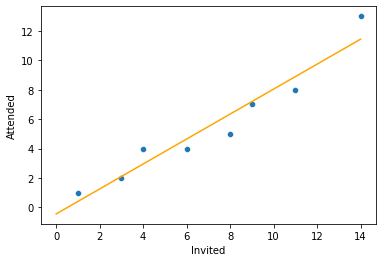

In [123]:
x1=np.arange(0,15)
y1=m*x1+b
sns.scatterplot(x=invite_attend["Invited"], y=invite_attend["Attended"])
plt.plot(x1,y1, c="orange")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# The variables are linearly related except for one point

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [132]:
# Your response here. 
i_a=invite_attend.drop(index=7)

In [133]:
lr= LinearRegression(fit_intercept=True)

In [134]:
rm=lr.fit(i_a["Invited"].to_frame(),i_a["Attended"])

In [135]:
m=lr.coef_
b=lr.intercept_

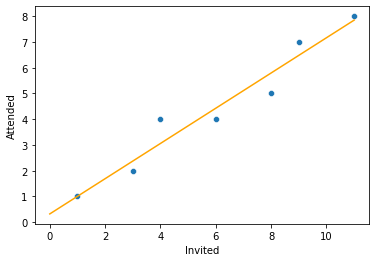

In [136]:
x1=np.arange(0,12)
y1=m*x1+b
sns.scatterplot(x=i_a["Invited"], y=i_a["Attended"])
plt.plot(x1,y1, c="orange")

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# With the point the variables seem to be not totally related, but without the point the variables are linearly related